In [11]:
from features_class import *
import pandas as pd
import json
import random

In [13]:
random.seed(10)

In [2]:
# This code extracts and save data with specific elastic property
# example shown below is to extract Bulk Voigt Modulus
prop = 'Bulk Modulus, Voigt'

In [3]:
# processed condition: set by default as True for debugging. To extract new property set to false
# filename is filename to store extracted data with designated property
processed = True
filename = 'data_prop_bulkModulus_Voigt.json'

if processed:
    with open(filename, 'r')as f_in:
        data = json.load(f_in)
else:
    prop = 'Bulk Modulus, Voigt'
    data_elastic = f.extract_elastic_data()
    data = f.extract_property(data_elastic, prop)
    f.check_all_equal_units(data, 'GPa')
    with open(filename, 'w') as fp:
        json.dump(data, fp)

There is 13 materials with negative property value
['NdMg3', 'LaIn', 'CoO2', 'NdBeO3', 'FeCo3O8', 'BaCl2', 'Kr', 'BaTe', 'Dy', 'Tb', 'CoBiO3', 'Ca3BiN', 'Ba(LaSe2)2']


/home/camila/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


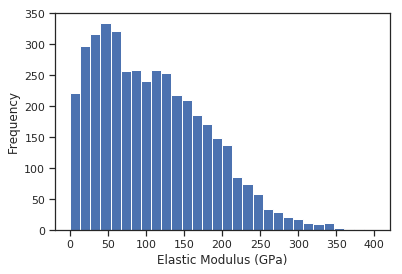

In [4]:
# plotting data distribution of chosen property
fig = f.plot_histogram(data, prop)
fig.savefig('Datadistribution.svg')
fig.show()

# check if labels are negative for designated property
f.check_negative_values(data)

In [7]:
# obtaining descriptive attributes
# get chemical elements information to generate descriptive attributes
fn = 'chemical_elements_full_v2.csv'
chem_list = f.get_chemicals_list(fn)
elements_data = pd.read_csv(fn, skipinitialspace=True, index_col="symbol")
elements_data.index = elements_data.index.str.strip()

In [33]:
# Generate data matrix. Size is (m_examples, n_features [135])
data_x = np.zeros((len(data), 135))
data_y = np.zeros((len(data), 1))

keys_list = list(data.keys())
random.shuffle(keys_list)
list_keys_out = []

print('generating data x,y matrix')
for i in range(len(keys_list)):
    key = list_keys[i]
    if i % 500 == 0:
        print(i)
    features = Features(key, chem_list, elements_data)
    features.elemental_composition()
    output = features.get_rest_features()
    data_x[i, :] = np.append(features.composition, output)
    data_y[i, 0] = data[key]['scalar']
    list_keys_out.append(key)

generating data x,y matrix
0
500
1000
1500
2000
2500
3000
3500
4000


In [32]:
# saving data (x, y) matrices
np.save('data_x.npy', data_x)
np.save('data_y.npy', data_y)

print('finished data extraction')

finished data extraction
